Importing the necessary libraries\
Seaborn Library - For graphic and statistical plotting built upon matplotlib. It helps in understanding the data better.\
MatplotLib  -  For building graphs.\
Pandas -  To perform data relevant tasks using datasets.\
Numpy - To perform all mathematical tasks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('market_data.csv')

In [3]:
df.head()


,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


In [4]:
df.tail()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
987,26191,19.69,0.18,32.60,0.81,26.22,1840,2238.49
988,132714,19.48,0.23,116.64,0.21,17.53,2156,1564.64
989,32894,22.79,0.49,39.33,0.26,29.23,503,1020.22
990,39091,13.84,0.14,37.71,0.33,23.13,2902,1201.03
991,37290,7.81,0.19,78.55,0.62,23.40,1820,653.62


In [5]:
df.describe()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,171327.118952,30.593034,0.251139,98.678740,0.494526,14.599829,1479.569556,1596.504284
std,81397.843301,17.493103,0.145348,57.117347,0.286810,8.715533,885.419636,927.474787
min,1992.000000,0.190000,0.000000,0.130000,0.000000,0.140000,4.000000,12.540000
25%,112479.250000,14.830000,0.130000,49.637500,0.250000,6.917500,708.250000,786.327500
50%,170390.500000,31.385000,0.250000,97.510000,0.490000,14.820000,1413.500000,1595.455000
75%,226027.250000,45.660000,0.380000,147.620000,0.740000,22.100000,2273.000000,2420.687500
max,393914.000000,59.960000,0.500000,199.910000,1.000000,29.990000,2997.000000,3198.270000


Pairplot step is an important step as it helps us in understanding the type of relation every attribute has with all the other attributs seperately.

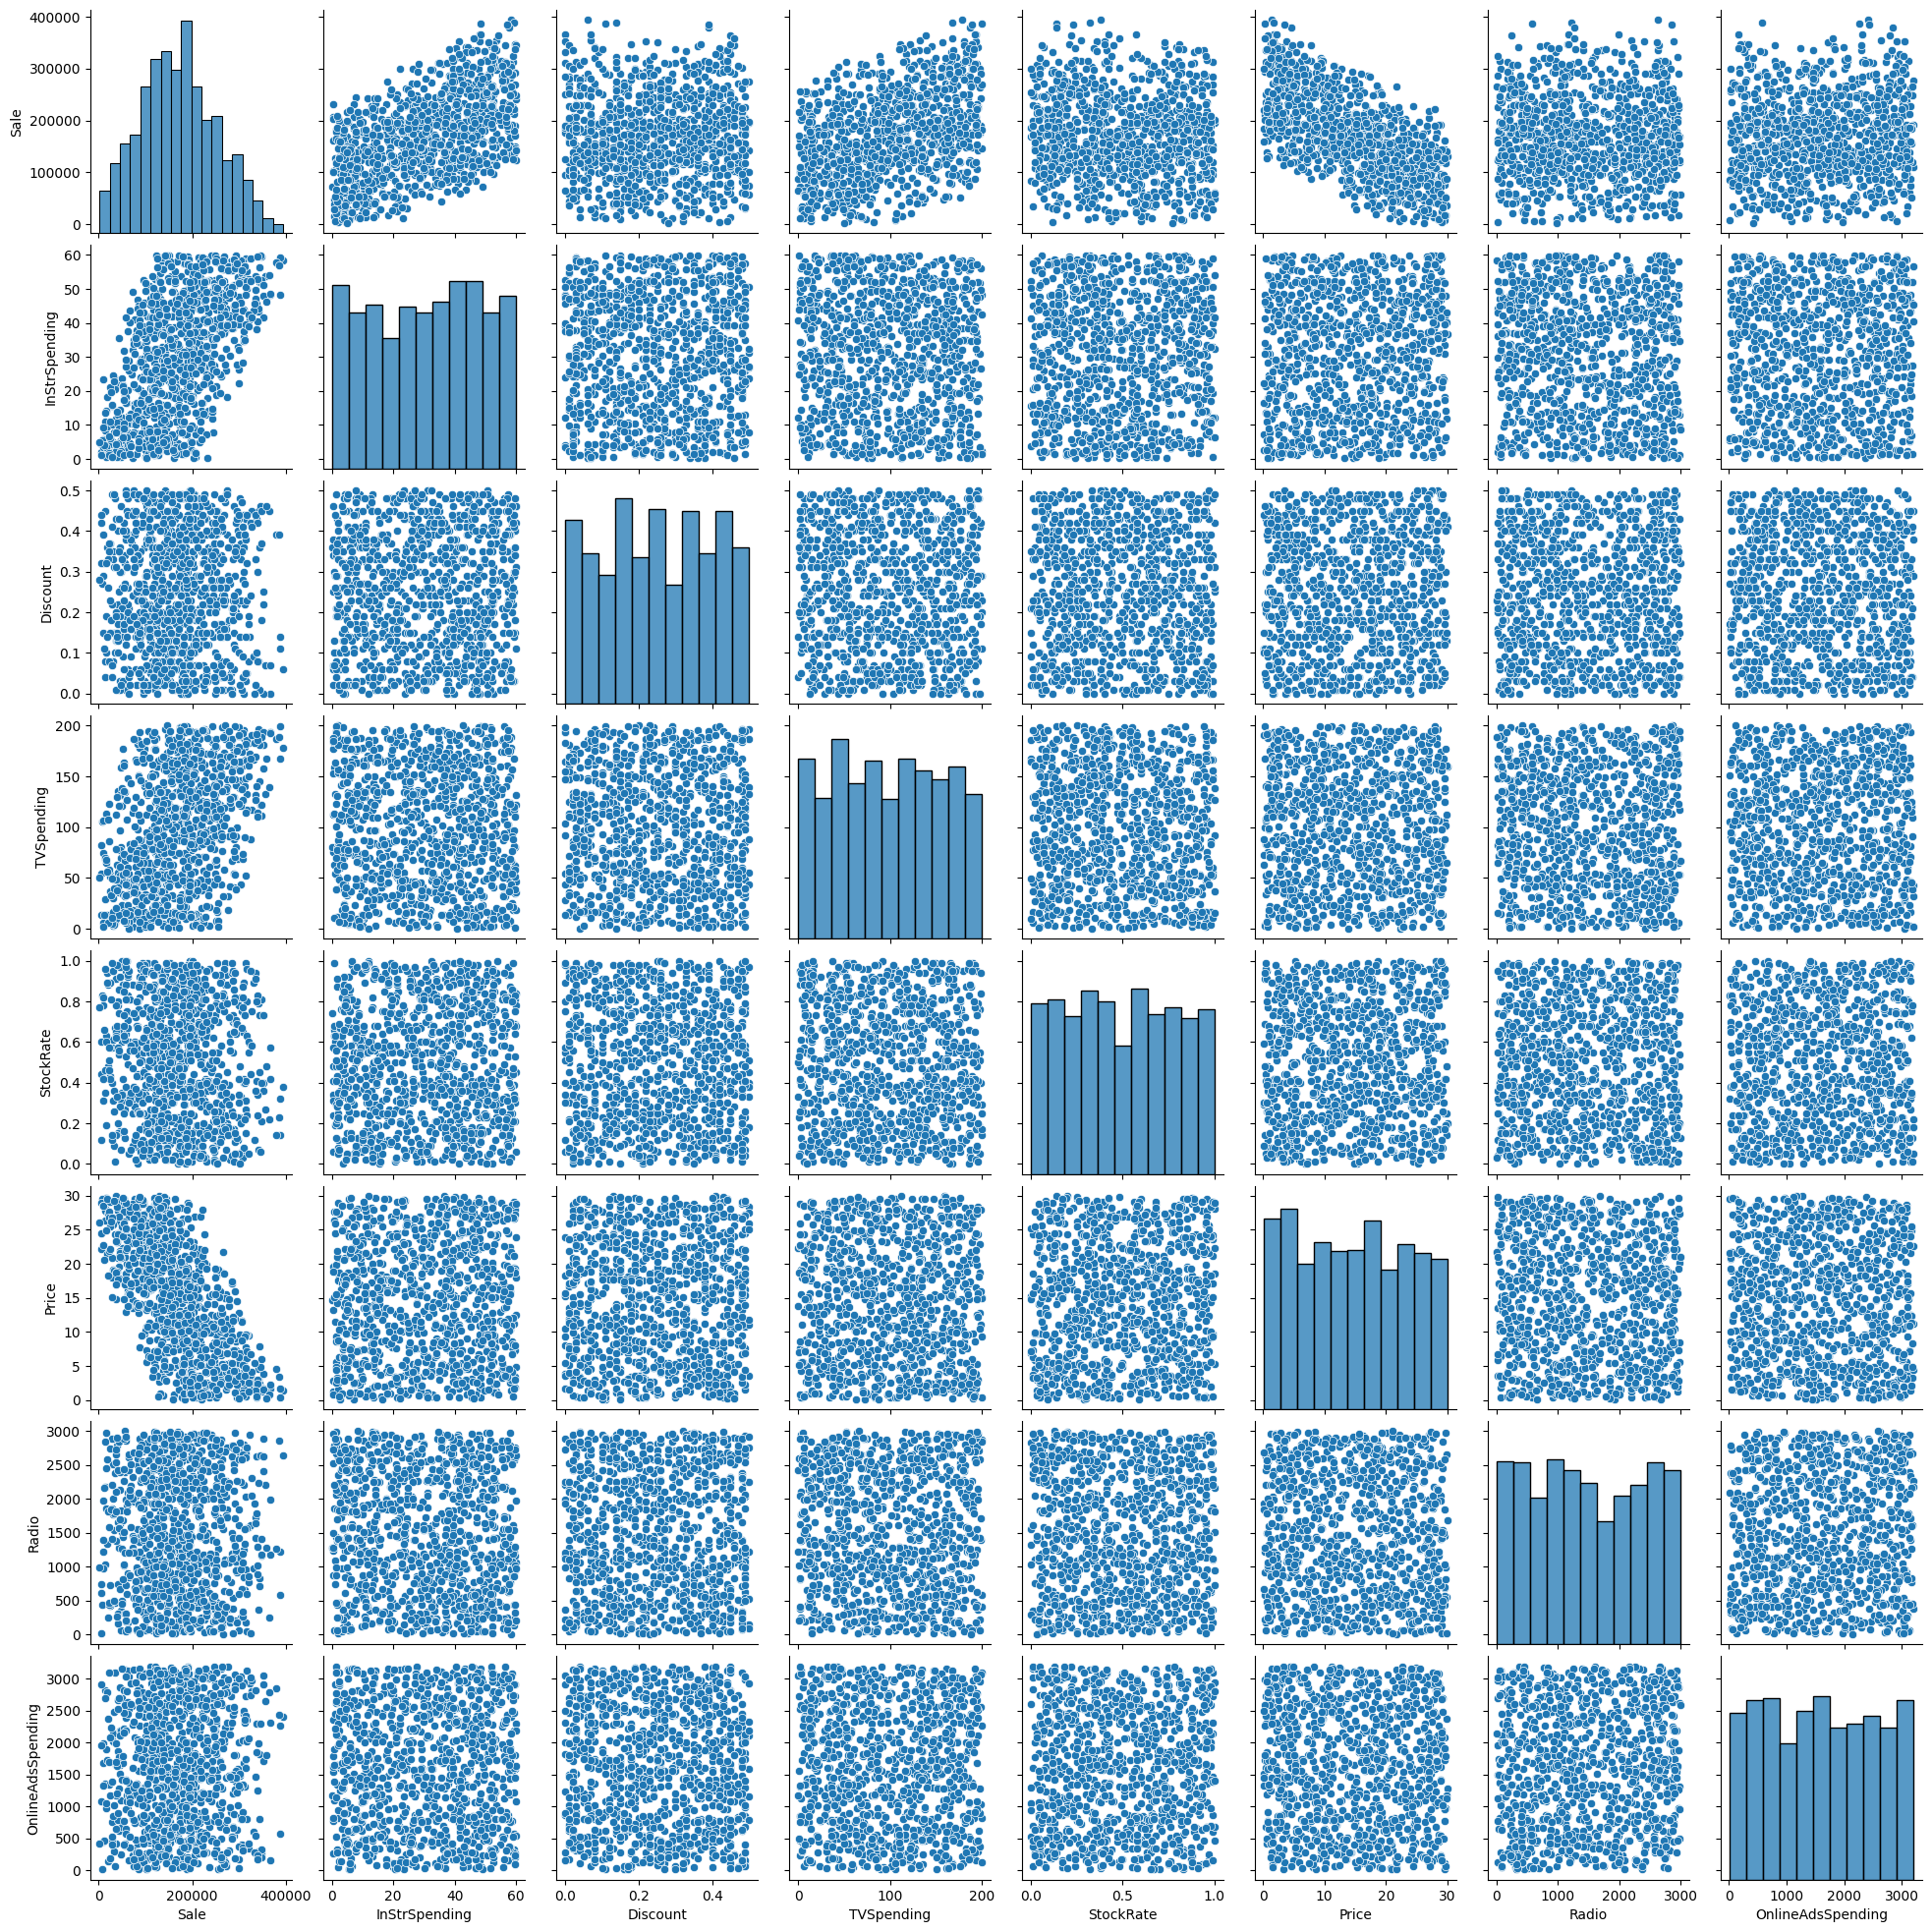

In [6]:
sns.pairplot(df)

The Heatmap helps us in analysing the data and relations through a color coded format along with values that show values for a main variable of interest across two axis variables as a grid of colored squares.

<Axes: >

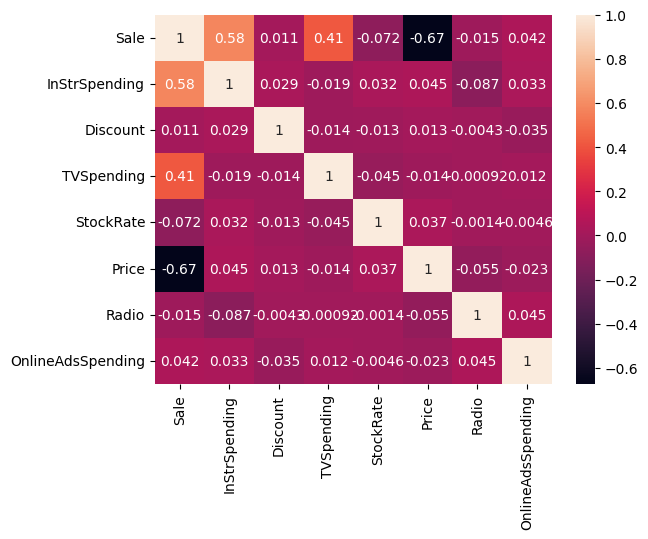

In [7]:
sns.heatmap(df.corr(), annot=True )

Here we are setting the variable x and y values for further training in the linear regression mocel. As we know that the linear regression model uses this formula :\
y = wx+b\
we are setting the target or dependant variable y and the independant variable x here

In [8]:
x = df[['Price','TVSpending','InStrSpending']]
y = df[['Sale']]

Import the Scikit or Sklearn library for using train and test model for splitting are data for training and testing and also for using the linear regression model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()


In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
print(lm.intercept_)

[120174.6035746]


In [15]:
print(lm.coef_)

[[-6512.96645457   589.82886902  2873.5441928 ]]


In [16]:
pred = lm.predict(x_test)

In [17]:
pred

array([[ 23086.41693154],
       [179987.07431491],
       [192814.80244787],
       [163248.95670824],
       [240494.71393504],
       [222520.43979854],
       [182789.55784225],
       [197574.03462988],
       [ 77254.36610667],
       [ 76018.17172052],
       [ 93998.71811244],
       [131847.88250105],
       [134967.78211275],
       [131499.92475693],
       [120148.00713637],
       [257183.50022187],
       [291551.06148837],
       [293241.81873644],
       [ 18486.63567988],
       [158629.37188592],
       [139169.82482116],
       [218752.73700977],
       [205633.22933644],
       [ 82064.3630631 ],
       [117615.3311514 ],
       [139077.51659581],
       [262901.54336186],
       [217410.75290783],
       [188819.62161912],
       [228591.19132833],
       [121708.244389  ],
       [141776.18190891],
       [ 36737.73195738],
       [125300.44195044],
       [ 93642.19816934],
       [288097.7451295 ],
       [ 66903.57088498],
       [ 68640.14130032],
       [3238

In [18]:
y_test

,Sale
36,31616
844,178264
719,191482
832,158940
407,246811
...,...
793,79009
416,111832
679,294684
365,96264


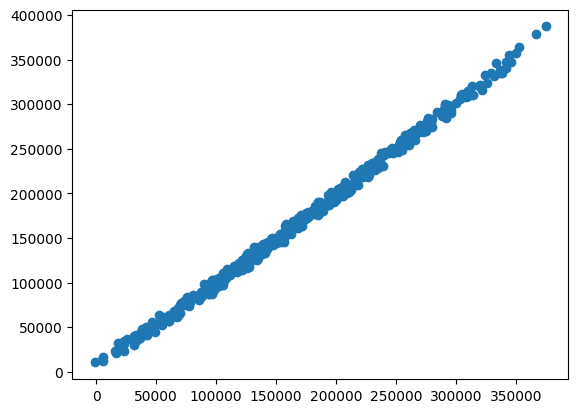

In [19]:
plt.scatter(pred, y_test)

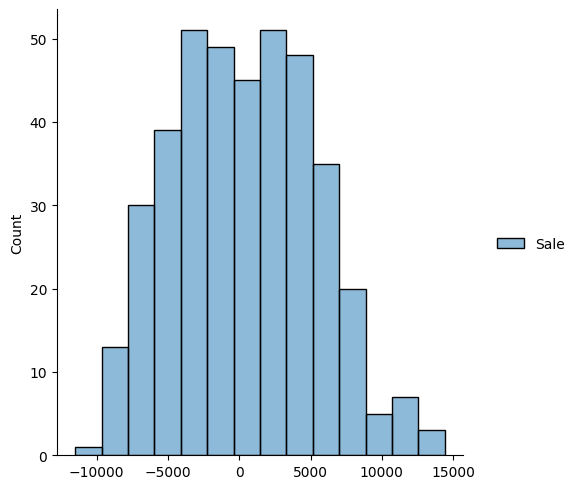

In [20]:
sns.displot(y_test - pred)

Here we are using sklearn metrics to get the r2 score which helps us in understanding the accuracy of the model that we have trained.

In [21]:
import sklearn.metrics as sm

print("R2 score =", round(sm.r2_score(y_test, pred), 2))

R2 score = 1.0


In [22]:
x = df[['Price','InStrSpending']]
y = df[['Sale']]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
print(lm.intercept_)

[181077.35894775]


In [29]:
print(lm.coef_)

[[-6480.65924718  2742.31090908]]


In [30]:
pred = lm.predict(x_test)

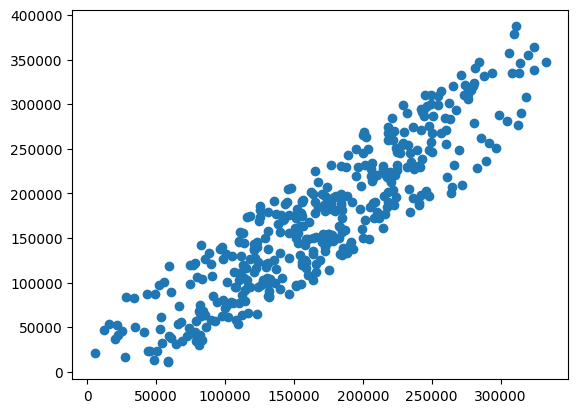

In [33]:
plt.scatter(pred,y_test)

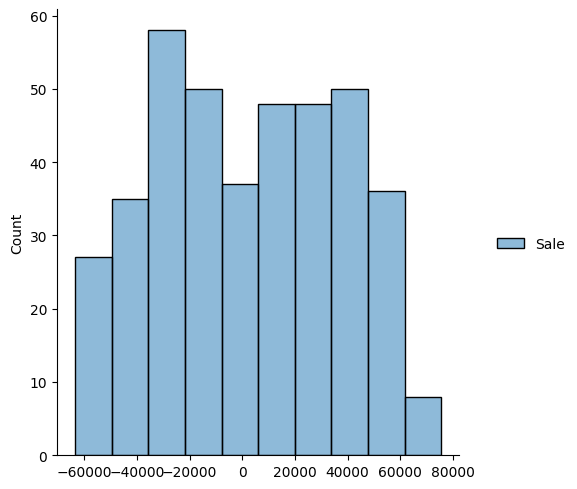

In [34]:
sns.displot(y_test - pred)

In [35]:
import sklearn.metrics as sm

print("R2 score =", round(sm.r2_score(y_test, pred), 2))

R2 score = 0.82


In [36]:
x = df[['Price','TVSpending']]
y = df[['Sale']]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
print(lm.intercept_)

[212226.16529976]


In [43]:
print(lm.coef_)

[[-6341.36048095   528.97502329]]


In [44]:
pred = lm.predict(x_test)

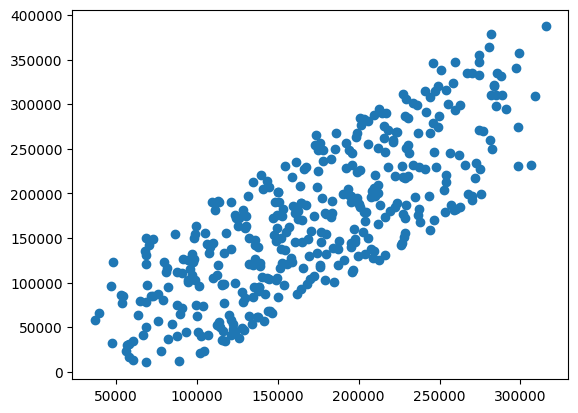

In [45]:
plt.scatter(pred,y_test)

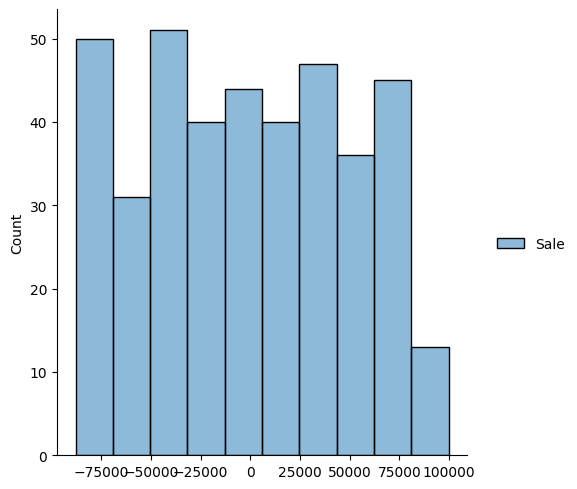

In [46]:
sns.displot(y_test - pred)

In [47]:
import sklearn.metrics as sm

print("R2 score =", round(sm.r2_score(y_test, pred), 2))

R2 score = 0.63


In [48]:
x = df[['Price','InStrSpending','StockRate']]
y = df[['Sale']]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
print(lm.intercept_)

[188963.65220978]


In [55]:
print(lm.coef_)

[[ -6437.69894254   2741.71419284 -16957.58373851]]


In [56]:
pred = lm.predict(x_test)

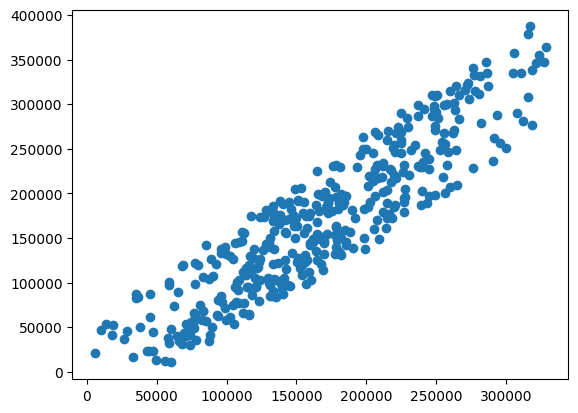

In [57]:
plt.scatter(pred,y_test)

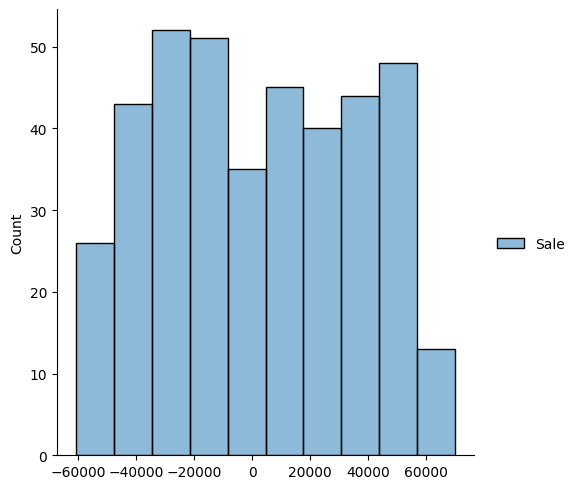

In [58]:
sns.displot(y_test - pred)

In [59]:
import sklearn.metrics as sm

print("R2 score =", round(sm.r2_score(y_test, pred), 2))

R2 score = 0.83
